## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Might need to use outer join to clear all duplicate
mouse_study_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = mouse_study_merge['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_merge['Mouse ID'].value_counts().head()

g989    13
b742    10
d251    10
e476    10
c402    10
Name: Mouse ID, dtype: int64

In [4]:
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_index = mouse_study_merge.set_index('Mouse ID')
cleaned_mouse_study = mouse_study_index.drop(index = 'g989')
mouse_study = cleaned_mouse_study.reset_index()

In [5]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = mouse_study['Mouse ID'].nunique()
new_number_of_mice

248

In [6]:
# Group cleaned_mouse_study by regimen
grouped_regimen = mouse_study.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_mean = grouped_regimen['Tumor Volume (mm3)'].mean()
tumor_vol_median = grouped_regimen['Tumor Volume (mm3)'].median()
tumor_vol_variance = grouped_regimen['Tumor Volume (mm3)'].var()
tumor_vol_std = grouped_regimen['Tumor Volume (mm3)'].std()
tumor_vol_sem = grouped_regimen['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_summary = pd.DataFrame({'Tumor Vol Mean': tumor_vol_mean,
                                'Tumor Vol Median': tumor_vol_median,
                                'Tumor Vol Variance': tumor_vol_variance,
                                'Tumor Vol Standard Deviation': tumor_vol_std,
                                'Tumor Vol SEM': tumor_vol_sem})
tumor_vol_summary

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_summary2 = grouped_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
# This method produces everything in a single groupby function
tumor_vol_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

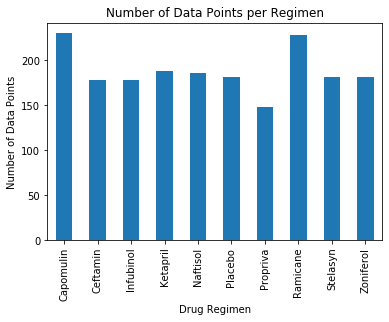

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
regimen_count = grouped_regimen['Drug Regimen'].count()

panda_plot = regimen_count.plot(kind="bar", title="Number of Data Points per Regimen")
panda_plot.set_ylabel("Number of Data Points")

([<matplotlib.axis.XTick at 0x20564178188>,
 <a list of 10 Text xticklabel objects>)

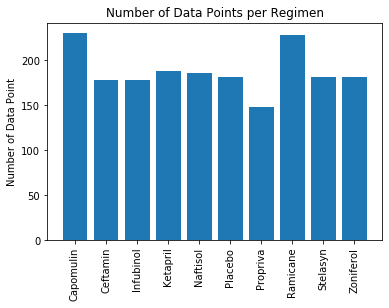

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimens = tumor_vol_summary.index.tolist()

x_axis = np.arange(len(grouped_regimen))
xticks = [x for x in x_axis]
plt.bar(x_axis, regimen_count)
plt.title("Number of Data Points per Regimen")
plt.ylabel("Number of Data Point")
plt.xticks(xticks, drug_regimens, rotation='vertical')

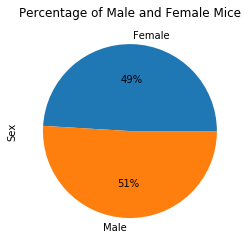

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_group = mouse_study.groupby(['Sex'])
gender_count = mouse_gender_group['Sex'].count()

gender_dist_pie_chart = gender_count.plot(kind="pie", autopct='%1.0f%%', title='Percentage of Male and Female Mice')
gender_dist_pie_chart

([<matplotlib.patches.Wedge at 0x20564275e88>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51%')])

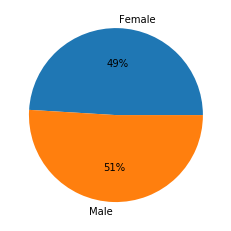

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plt.pie(gender_count, labels=labels, autopct='%1.0f%%')

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_group = mouse_study.groupby(['Drug Regimen','Mouse ID','Timepoint'])
final_tumor_volume = regimen_group['Timepoint'].max()

# data.groupby(['Country','Place'])['Value'].max()
# https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
max_timepoint = mouse_study.groupby(['Drug Regimen','Mouse ID','Timepoint'])['Timepoint'].max()
# max_timepoint_df = max_timepoint.merge(mouse_study, on='Mouse ID')

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

top_regimens = mouse_study[mouse_study["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
capomulin = mouse_study[mouse_study["Drug Regimen"].isin(["Capomulin"])]
max_cap_mouse = capomulin.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(max_cap_mouse, mouse_study, on=('Mouse ID','Timepoint'))
capomulin_tumor = capomulin_merge['Tumor Volume (mm3)']

In [13]:
ramicane = mouse_study[mouse_study["Drug Regimen"].isin(["Ramicane"])]
max_ram_mouse = ramicane.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
ramicane_merge = pd.merge(max_ram_mouse, mouse_study, on=('Mouse ID','Timepoint'))
ramicane_tumor = ramicane_merge['Tumor Volume (mm3)']

In [14]:
infubinol = mouse_study[mouse_study["Drug Regimen"].isin(["Infubinol"])]
max_inf_mouse = infubinol.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
infubinol_merge = pd.merge(max_inf_mouse, mouse_study, on=('Mouse ID','Timepoint'))
infubinol_tumor = infubinol_merge['Tumor Volume (mm3)']

In [15]:
ceftamin = mouse_study[mouse_study["Drug Regimen"].isin(["Ceftamin"])]
max_cef_mouse = ceftamin.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
ceftamin_merge = pd.merge(max_cef_mouse, mouse_study, on=('Mouse ID','Timepoint'))
ceftamin_tumor = ceftamin_merge['Tumor Volume (mm3)']

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_quartiles = ramicane_merge['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])

lowerq = ram_quartiles[0.25]
upperq = ram_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound   
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

17.912664470000003

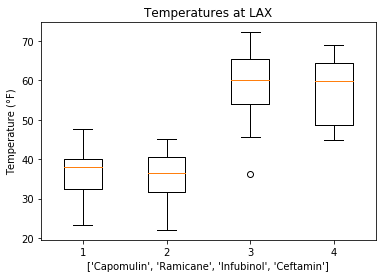

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.set_xlabel(treatment_list)
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

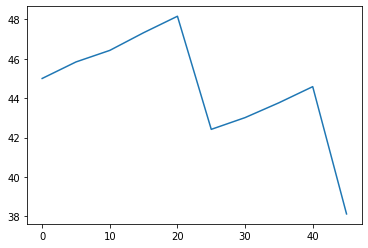

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
j119_df = capomulin.loc[capomulin["Mouse ID"] == "j119"]

line_xaxis = j119_df["Timepoint"]
line_yaxis = j119_df["Tumor Volume (mm3)"]
plt.plot(line_xaxis, line_yaxis)

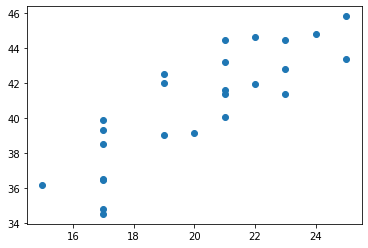

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin.groupby(['Mouse ID']).mean().reset_index()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

## Correlation and Regression

Text(6, 10, 'y = 0.95x + 21.55')

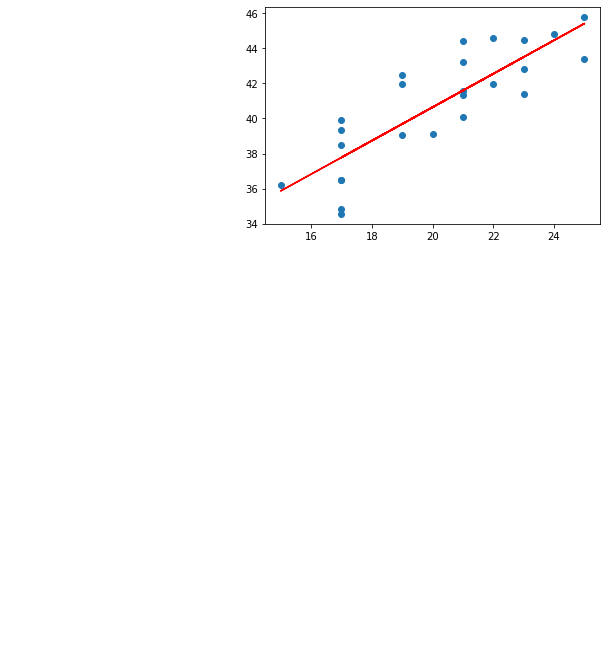

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)

x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")